# Customer Life Time Value

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, median_absolute_error
from sklearn.linear_model import LinearRegression

In [3]:
plt.style.use('ggplot')

## Load Data

In [4]:
df = pd.read_excel('../data/Online Retail.xlsx', sheet_name='Online Retail')

In [5]:
df.shape

(541909, 8)

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Clean-Up

In [13]:
df['CustomerID'] = df['CustomerID'].astype("int")

In [7]:
df = df.loc[df['Quantity'] > 0]

In [8]:
df = df[pd.notnull(df['CustomerID'])]

In [9]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [10]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [14]:
orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({'Sales': sum, 'InvoiceDate': max})

In [15]:
orders_df

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346      541431     77183.60 2011-01-18 10:01:00
12347      537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283      578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287      554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17758 rows x 2 columns]

## EDA

In [16]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [17]:
summary_df = orders_df.reset_index().groupby('CustomerID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})

In [18]:
summary_df

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346       77183.60  77183.60  77183.60  77183.600000   1.0   
12347         382.52   1294.32   4085.18    680.863333   6.0   
12348         227.44    892.80   1797.24    449.310000   4.0   
12349        1757.55   1757.55   1757.55   1757.550000   1.0   
12350         334.40    334.40    334.40    334.400000   1.0   
...              ...       ...       ...           ...   ...   
18280         180.60    180.60    180.60    180.600000   1.0   
18281          80.82     80.82     80.82     80.820000   1.0   
18282         100.21    100.21    100.21    100.210000   1.0   
18283           1.95    313.65   1886.88    125.792000  15.0   
18287          70.68   1001.32   1837.28    612.426667   3.0   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346      2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347      2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348      2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349      2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350      2011-02-02 16:01:00 2011-02-02 16:01:00                 0   
...                        ...                 ...               ...   
18280      2011-03-07 09:52:00 2011-03-07 09:52:00                 0   
18281      2011-06-12 10:53:00 2011-06-12 10:53:00                 0   
18282      2011-08-05 13:35:00 2011-08-05 13:35:00                 0   
18283      2011-01-06 14:14:00 2011-11-30 12:59:00               327   
18287      2011-05-22 10:39:00 2011-10-28 09:29:00               158   

                               
           purchase_frequency  
CustomerID                     
12346                0.000000  
12347               54.500000  
12348               70.500000  
12349                0.000000  
12350                0.000000  
...                       ...  
18280                0.000000  
18281                0.000000  
18282                0.000000  
18283               21.800000  
18287               52.666667  

[4298 rows x 9 columns]

In [19]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [20]:
summary_df

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346,77183.60,77183.60,77183.60,77183.600000,1.0,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.000000
12347,382.52,1294.32,4085.18,680.863333,6.0,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348,227.44,892.80,1797.24,449.310000,4.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12349,1757.55,1757.55,1757.55,1757.550000,1.0,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.000000
12350,334.40,334.40,334.40,334.400000,1.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000
...,...,...,...,...,...,...,...,...,...
18280,180.60,180.60,180.60,180.600000,1.0,2011-03-07 09:52:00,2011-03-07 09:52:00,0,0.000000
18281,80.82,80.82,80.82,80.820000,1.0,2011-06-12 10:53:00,2011-06-12 10:53:00,0,0.000000
18282,100.21,100.21,100.21,100.210000,1.0,2011-08-05 13:35:00,2011-08-05 13:35:00,0,0.000000


In [21]:
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]

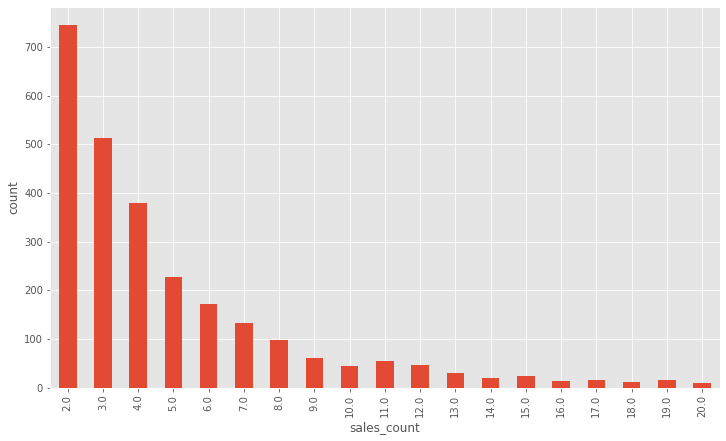

In [22]:
ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(
    kind='bar', 
    figsize=(12,7)
)
ax.set_ylabel('count')
plt.show()

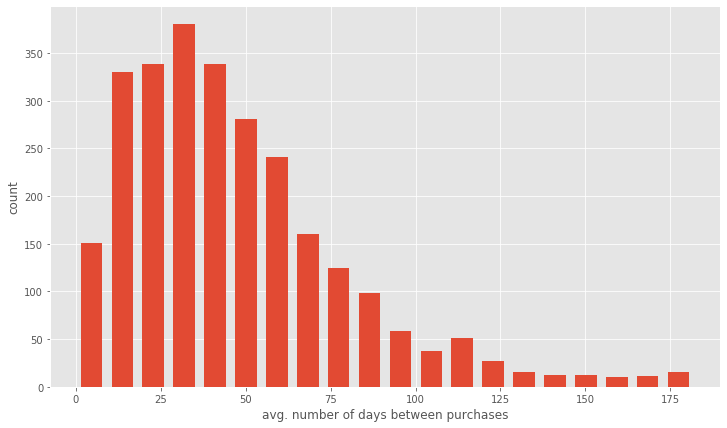

In [23]:
ax = summary_df['invoicedate_purchase_frequency'].hist(
    bins=20,
    rwidth=0.7,
    figsize=(12,7)
)
ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')
plt.show()

## Predicting 3-Month CLV

### Data Preparation

In [24]:
clv_freq = '3M'

In [25]:
data_df = orders_df.reset_index().groupby(['CustomerID', pd.Grouper(key='InvoiceDate', freq=clv_freq)
]).agg({'Sales': [sum, groupby_mean, groupby_count]})

In [26]:
data_df.columns = ['_'.join(col).lower() for col in data_df.columns]

In [27]:
data_df = data_df.reset_index()

In [29]:
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346,2011-03-31,77183.60,77183.600,1.0
1,12347,2010-12-31,711.79,711.790,1.0
2,12347,2011-03-31,475.39,475.390,1.0
3,12347,2011-06-30,1018.77,509.385,2.0
4,12347,2011-09-30,584.91,584.910,1.0


In [30]:
date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
        sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True)
    )
}

In [31]:
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

In [32]:
date_month_map

{'2011-12-31': 'M_1',
 '2011-09-30': 'M_2',
 '2011-06-30': 'M_3',
 '2011-03-31': 'M_4',
 '2010-12-31': 'M_5'}

In [33]:
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346,2011-03-31,77183.60,77183.600,1.0,M_4
1,12347,2010-12-31,711.79,711.790,1.0,M_5
2,12347,2011-03-31,475.39,475.390,1.0,M_4
3,12347,2011-06-30,1018.77,509.385,2.0,M_3
4,12347,2011-09-30,584.91,584.910,1.0,M_2


In [34]:
features_df = pd.pivot_table(
    data_df.loc[data_df['M'] != 'M_1'], 
    values=['sales_sum', 'sales_avg', 'sales_count'], 
    columns='M', 
    index='CustomerID'
)

In [35]:
features_df.columns = ['_'.join(col) for col in features_df.columns]

In [36]:
features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
12352,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN


In [37]:
features_df = features_df.fillna(0)

In [38]:
response_df = data_df.loc[
    data_df['M'] == 'M_1',
    ['CustomerID', 'sales_sum']
]

In [40]:
response_df.columns = ['CustomerID', 'CLV_' + clv_freq]

In [41]:
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left'
)

In [42]:
sample_set_df = sample_set_df.fillna(0)

In [43]:
sample_set_df['CLV_' + clv_freq].describe()

count     3616.000000
mean       511.558520
std       2371.743293
min          0.000000
25%          0.000000
50%          0.000000
75%        458.662500
max      68012.350000
Name: CLV_3M, dtype: float64

### Regression Models

In [44]:
target_var = 'CLV_' + clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]

In [45]:
x_train, x_test, y_train, y_test = train_test_split(
    sample_set_df[all_features], 
    sample_set_df[target_var], 
    test_size=0.3
)

In [46]:
reg_fit = LinearRegression()

In [47]:
reg_fit.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
reg_fit.intercept_

72.59469366758935

In [52]:
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']
coef

,feature,coef
0,sales_avg_M_2,0.226399
1,sales_avg_M_3,-0.439150
2,sales_avg_M_4,0.096447
3,sales_avg_M_5,-0.387940
4,sales_count_M_2,83.932169
5,sales_count_M_3,-9.329617
6,sales_count_M_4,14.405871
7,sales_count_M_5,-95.968242
8,sales_sum_M_2,0.239914
9,sales_sum_M_3,0.440310


### Evaluation

In [53]:
train_preds =  reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

In [54]:
print('In-Sample R-Squared: %0.4f' % r2_score(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true=y_test, y_pred=test_preds))

In-Sample R-Squared: 0.8111
Out-of-Sample R-Squared: 0.5712


In [55]:
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

In-Sample MSE: 190.8110
Out-of-Sample MSE: 168.7647


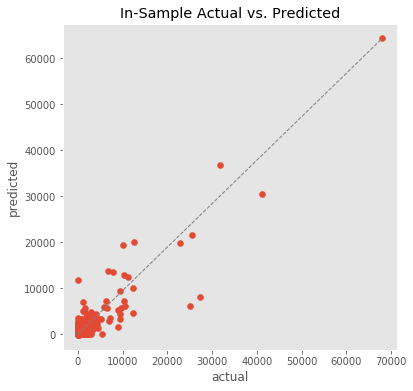

In [61]:
plt.figure(figsize=(6, 6))
plt.scatter(y_train, train_preds)
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('In-Sample Actual vs. Predicted')
plt.grid()
plt.show()

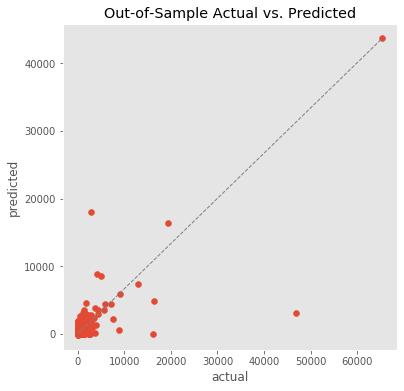

In [62]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()
plt.show()